<a href="https://colab.research.google.com/github/Artem-k0o/First-steps/blob/main/Are_movies_getting_worse%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
titles=pd.read_csv('/content/title.basics (1).tsv',delimiter='\t')
titles.head()

<ipython-input-8-85347e7eaafd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles=pd.read_csv('/content/title.basics (1).tsv',delimiter='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [10]:
titles.groupby('titleType')['tconst'].count()

,tconst
titleType,
movie,703056
short,1039043
tvEpisode,8719194
tvMiniSeries,59556
tvMovie,148763
tvPilot,1
tvSeries,275277
tvShort,10455
tvSpecial,51321


In [11]:
movie_db=titles[(titles['titleType']=='movie') | (titles['titleType']=='tvMovie')]

In [14]:
counts_by_year=movie_db.groupby('startYear')['tconst'].count().reset_index()
print(counts_by_year)

    startYear  tconst
0        1888       1
1        1894       1
2        1896       1
3        1897       2
4        1898       7
..        ...     ...
133      2027      29
134      2028       4
135      2029       1
136      2031       1
137        \N  106706

[138 rows x 2 columns]


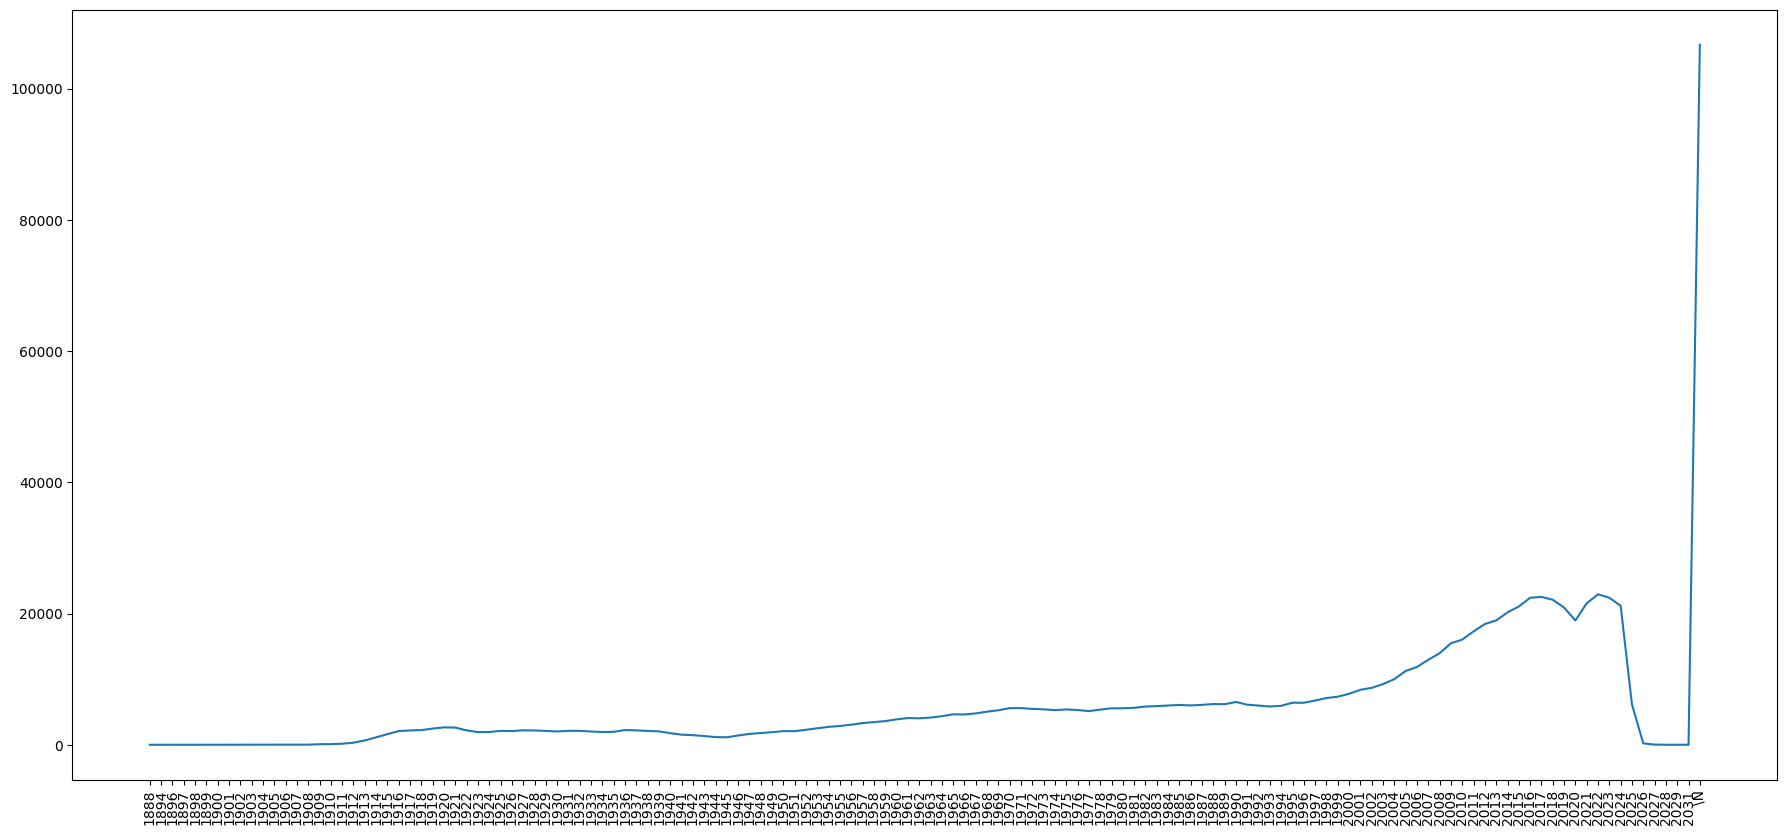

In [26]:
plt.figure(figsize=(22, 10))
plt.plot(counts_by_year['startYear'],counts_by_year['tconst'])
plt.xticks(rotation=90)
plt.show()

In [30]:
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851819 entries, 8 to 11352949
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          851819 non-null  object
 1   titleType       851819 non-null  object
 2   primaryTitle    851817 non-null  object
 3   originalTitle   851817 non-null  object
 4   isAdult         851819 non-null  object
 5   startYear       851819 non-null  object
 6   endYear         851819 non-null  object
 7   runtimeMinutes  851819 non-null  object
 8   genres          851819 non-null  object
dtypes: object(9)
memory usage: 65.0+ MB


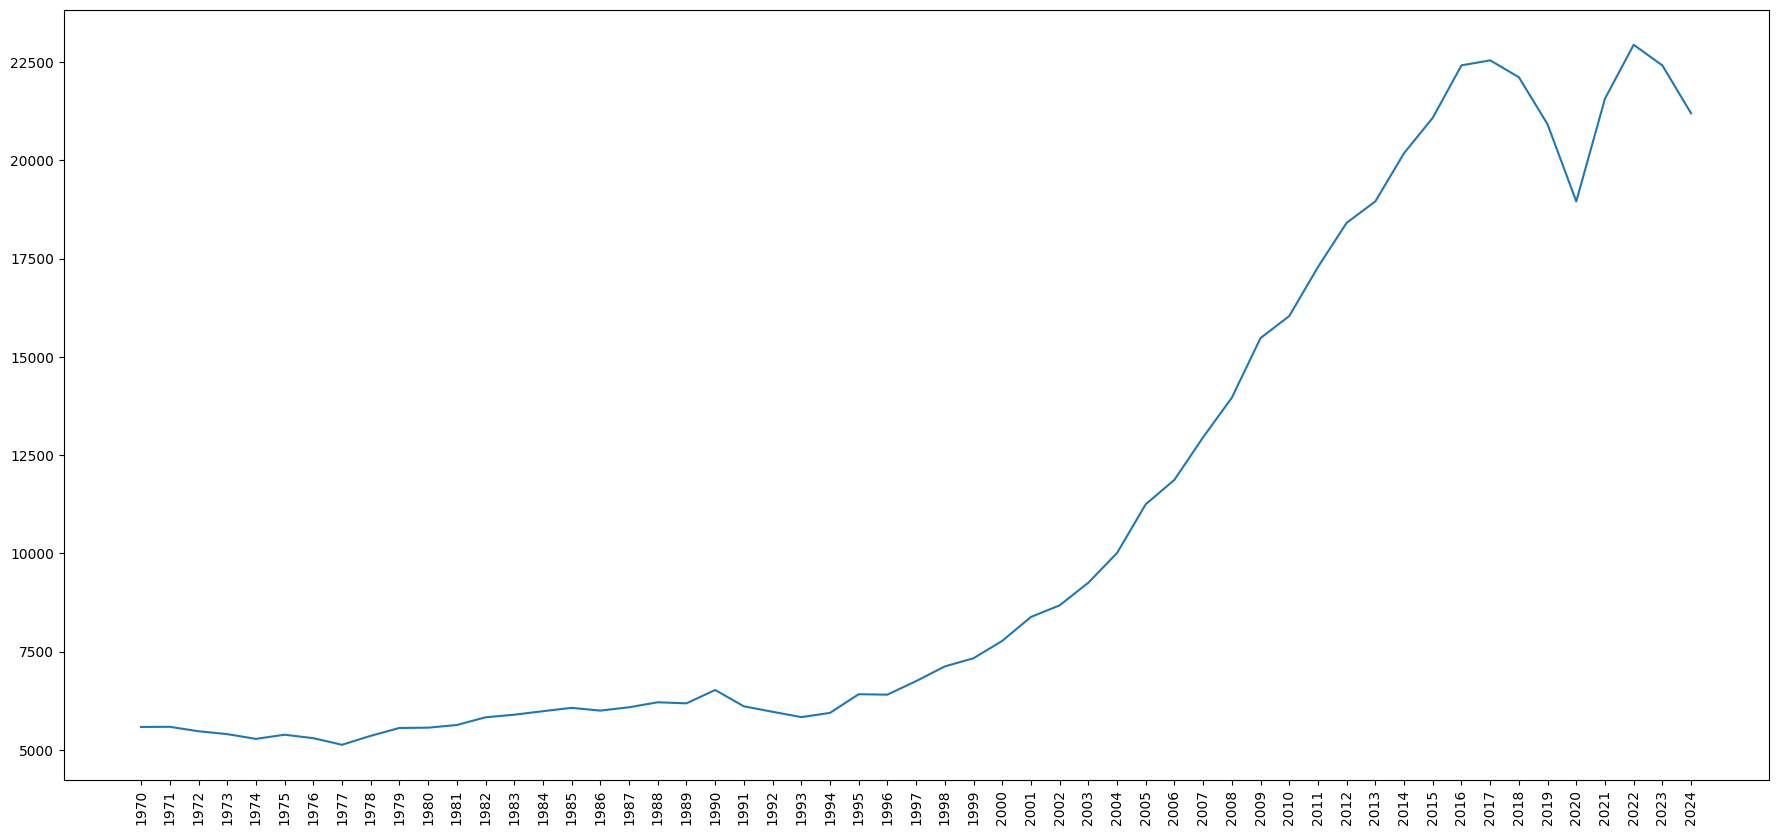

In [33]:
movie_db=movie_db[movie_db['startYear']!='\\N']
movie_db=movie_db[(movie_db['startYear'].astype(int)>=1970) & (movie_db['startYear'].astype(int)<=2024)]
counts_by_year=movie_db.groupby('startYear')['tconst'].count().reset_index()
plt.figure(figsize=(22, 10))
plt.plot(counts_by_year['startYear'],counts_by_year['tconst'])
plt.xticks(rotation=90)
plt.show()

In [34]:
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594549 entries, 11631 to 11352949
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          594549 non-null  object
 1   titleType       594549 non-null  object
 2   primaryTitle    594547 non-null  object
 3   originalTitle   594547 non-null  object
 4   isAdult         594549 non-null  object
 5   startYear       594549 non-null  object
 6   endYear         594549 non-null  object
 7   runtimeMinutes  594549 non-null  object
 8   genres          594549 non-null  object
dtypes: object(9)
memory usage: 45.4+ MB


In [36]:
movie_db.groupby('runtimeMinutes')['tconst'].count().reset_index()

,runtimeMinutes,tconst
0,1,24
1,10,96
2,100,10966
3,10062,1
4,101,3679
...,...,...
509,960,2
510,97,6097
511,98,6041
512,99,4353


In [37]:
ratings=pd.read_csv('/content/title.ratings.tsv',delimiter='\t')
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2141
1,tt0000002,5.5,290
2,tt0000003,6.4,2179
3,tt0000004,5.3,186
4,tt0000005,6.2,2912


In [38]:
movie_ratings_db=pd.merge(movie_db,ratings,how='left',on='tconst')
movie_ratings_db.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime",NaN,NaN
1,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.3,31.0
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,91448.0
3,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,118,"Drama,War",6.4,371.0
4,tt0038086,movie,Shiva und die Galgenblume,Shiva und die Galgenblume,0,1993,\N,\N,Thriller,7.0,27.0


In [40]:
movie_ratings_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594549 entries, 0 to 594548
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          594549 non-null  object 
 1   titleType       594549 non-null  object 
 2   primaryTitle    594547 non-null  object 
 3   originalTitle   594547 non-null  object 
 4   isAdult         594549 non-null  object 
 5   startYear       594549 non-null  object 
 6   endYear         594549 non-null  object 
 7   runtimeMinutes  594549 non-null  object 
 8   genres          594549 non-null  object 
 9   averageRating   318648 non-null  float64
 10  numVotes        318648 non-null  float64
dtypes: float64(2), object(9)
memory usage: 49.9+ MB


In [41]:
movie_ratings_db=movie_ratings_db.dropna()
movie_ratings_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318647 entries, 1 to 594547
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          318647 non-null  object 
 1   titleType       318647 non-null  object 
 2   primaryTitle    318647 non-null  object 
 3   originalTitle   318647 non-null  object 
 4   isAdult         318647 non-null  object 
 5   startYear       318647 non-null  object 
 6   endYear         318647 non-null  object 
 7   runtimeMinutes  318647 non-null  object 
 8   genres          318647 non-null  object 
 9   averageRating   318647 non-null  float64
 10  numVotes        318647 non-null  float64
dtypes: float64(2), object(9)
memory usage: 29.2+ MB


In [42]:
movie_ratings_db.groupby('runtimeMinutes')['tconst'].count().reset_index()

,runtimeMinutes,tconst
0,1,4
1,10,11
2,100,8562
3,10062,1
4,101,3012
...,...,...
415,960,1
416,97,4972
417,98,4942
418,99,3617


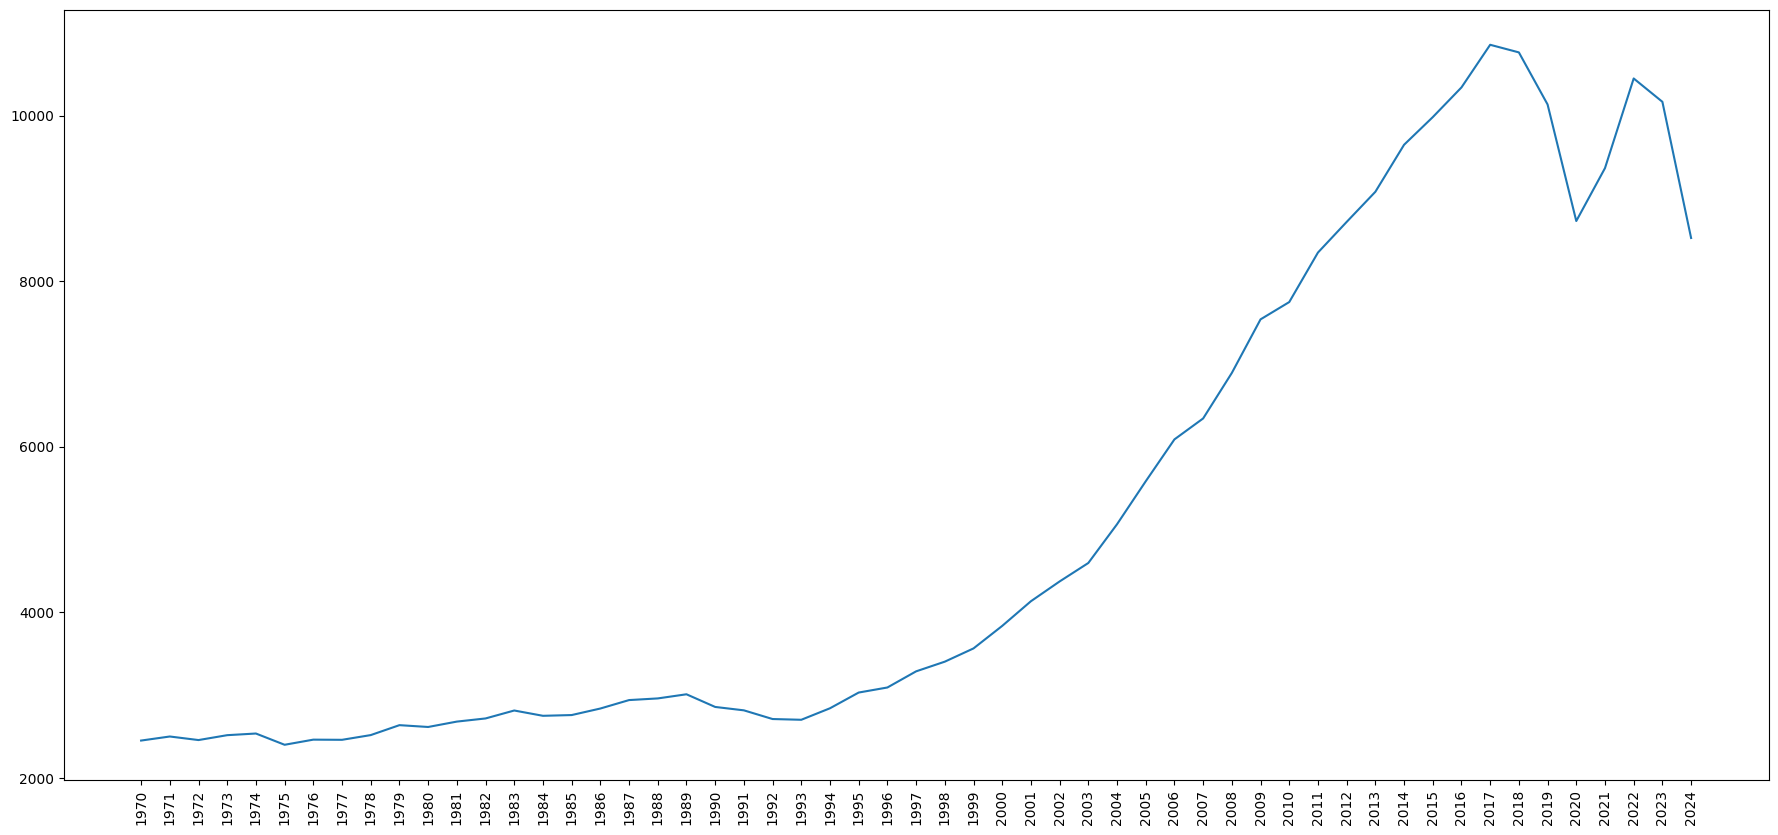

In [45]:
movie_ratings_db=movie_ratings_db[movie_ratings_db['runtimeMinutes']!='\\N']
movie_ratings_db=movie_ratings_db[(movie_ratings_db['runtimeMinutes'].astype(int)>=30) & (movie_ratings_db['runtimeMinutes'].astype(int)<=360)]
counts_by_year2=movie_ratings_db.groupby('startYear')['tconst'].count().reset_index()
plt.figure(figsize=(22, 10))
plt.plot(counts_by_year2['startYear'],counts_by_year2['tconst'])
plt.xticks(rotation=90)
plt.show()

In [47]:
movie_ratings_db=movie_ratings_db[movie_ratings_db['numVotes']>=100]
movie_ratings_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125978 entries, 2 to 594518
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          125978 non-null  object 
 1   titleType       125978 non-null  object 
 2   primaryTitle    125978 non-null  object 
 3   originalTitle   125978 non-null  object 
 4   isAdult         125978 non-null  object 
 5   startYear       125978 non-null  object 
 6   endYear         125978 non-null  object 
 7   runtimeMinutes  125978 non-null  object 
 8   genres          125978 non-null  object 
 9   averageRating   125978 non-null  float64
 10  numVotes        125978 non-null  float64
dtypes: float64(2), object(9)
memory usage: 11.5+ MB


In [48]:
def categorize(value):
    if value < 1000:
        return 'Low'
    elif 1000 <= value < 10000:
        return 'Medium'
    elif 10000 <= value < 50000:
        return 'High'
    elif 50000 <= value < 100000:
        return 'Enormous'
    elif 100000 <= value < 500000:
        return 'Big AF'
    else:
        return 'Absolute'
movie_ratings_db['numvotes_category'] = movie_ratings_db['numVotes'].apply(categorize)
movie_ratings_db.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numvotes_category
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,91448.0,Enormous
3,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,118,"Drama,War",6.4,371.0,Low
5,tt0038687,movie,Let There Be Light,Let There Be Light,0,1980,\N,58,"Documentary,War",7.4,2081.0,Medium
6,tt0039442,movie,"Habla, mudita","Habla, mudita",0,1973,\N,88,Drama,6.1,173.0,Low
7,tt0044952,movie,Nagarik,Nagarik,0,1977,\N,127,Drama,7.9,246.0,Low


In [51]:
def categorize_rating(value):
    if value < 4:
        return 'shit'
    elif 4 <= value < 6:
        return 'mid'
    elif 6 <= value < 8:
        return 'good'
    else:
        return 'amazing'
movie_ratings_db['rating_category'] = movie_ratings_db['averageRating'].apply(categorize_rating)
movie_ratings_db.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numvotes_category,rating_category
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,91448.0,Enormous,good
3,tt0036606,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,\N,118,"Drama,War",6.4,371.0,Low,good
5,tt0038687,movie,Let There Be Light,Let There Be Light,0,1980,\N,58,"Documentary,War",7.4,2081.0,Medium,good
6,tt0039442,movie,"Habla, mudita","Habla, mudita",0,1973,\N,88,Drama,6.1,173.0,Low,good
7,tt0044952,movie,Nagarik,Nagarik,0,1977,\N,127,Drama,7.9,246.0,Low,good


In [53]:
movie_ratings_db.groupby(['startYear','numvotes_category','rating_category']).agg({'averageRating': 'mean', 'numVotes': 'mean', 'tconst': 'count'})

averageRating       numVotes  \
startYear numvotes_category rating_category                                 
1970      Big AF            good                  7.500000  114940.500000   
          Enormous          good                  6.966667   63808.666667   
          High              amazing               8.050000   16545.000000   
                            good                  7.206897   21160.724138   
                            shit                  3.300000   20053.000000   
...                                                    ...            ...   
2024      Low               shit                  3.197348     291.965909   
          Medium            amazing               8.488800    2411.088000   
                            good                  6.880462    2776.745798   
                            mid                   5.162963    2897.848485   
                            shit                  3.216667    2141.611111   

                                             tconst  
startYear numvotes_category rating_category          
1970      Big AF            good                  2  
          Enormous          good                  3  
          High              amazing               2  
                            good                 29  
                            shit                  1  
...                                             ...  
2024      Low               shit                264  
          Medium            amazing             125  
                            good                476  
                            mid                 297  
                            shit                 36  

[1019 rows x 3 columns]

In [57]:
# Group by all three columns and count tconst
grouped = movie_ratings_db.groupby(['startYear', 'numvotes_category', 'rating_category']).agg({'averageRating': 'mean', 'numVotes': 'mean', 'tconst': 'count'}).rename(columns={'tconst': 'count'})

# Group by only 'startYear' and 'numvotes_category' to get total count per main category
total_counts = movie_ratings_db.groupby(['startYear', 'numvotes_category'])['tconst'].count().rename('total_count')

# Merge to calculate 'pct'
grouped = grouped.merge(total_counts, left_index=True, right_index=True)
grouped['pct'] = grouped['count'] / grouped['total_count']
grouped = grouped.reset_index()
print(grouped)

     startYear numvotes_category rating_category  averageRating  \
0         1970            Big AF            good       7.500000   
1         1970          Enormous            good       6.966667   
2         1970              High         amazing       8.050000   
3         1970              High            good       7.206897   
4         1970              High            shit       3.300000   
...        ...               ...             ...            ...   
1014      2024               Low            shit       3.197348   
1015      2024            Medium         amazing       8.488800   
1016      2024            Medium            good       6.880462   
1017      2024            Medium             mid       5.162963   
1018      2024            Medium            shit       3.216667   

           numVotes  count  total_count       pct  
0     114940.500000      2            2  1.000000  
1      63808.666667      3            3  1.000000  
2      16545.000000      2           32

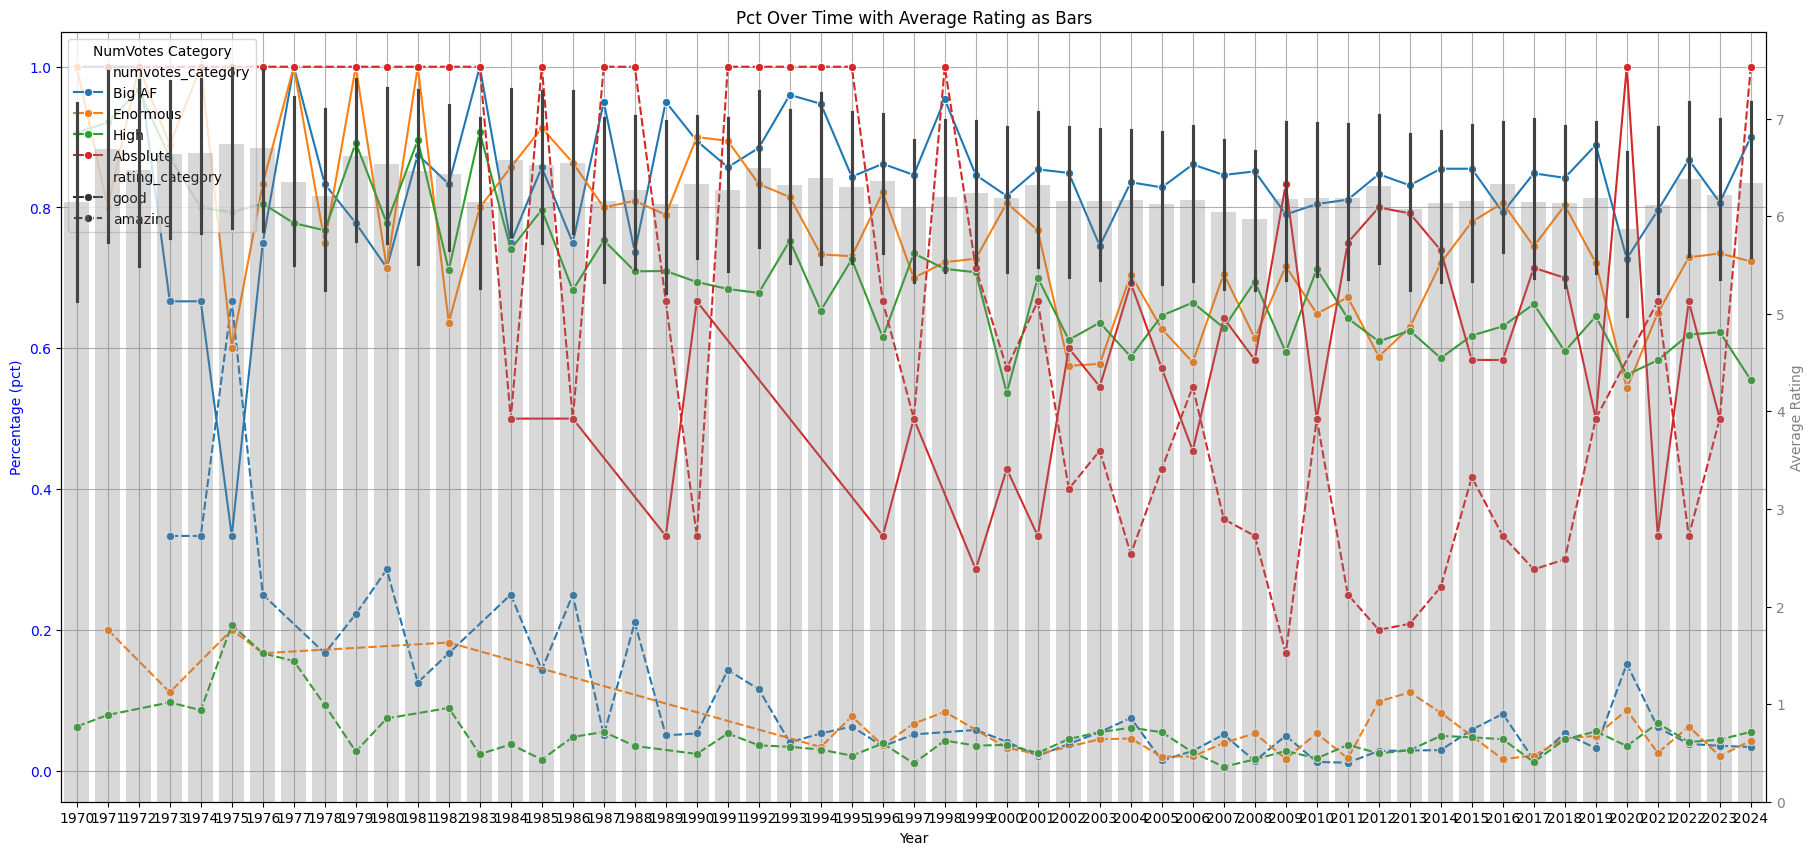

In [64]:
# Plot 'pct' over time for each 'numvotes_category'

grouped2=grouped[(grouped['numvotes_category'].isin(['High','Enormous','Big AF','Absolute']))&(grouped['rating_category'].isin(['good','amazing']))]
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped2, x='startYear', y='pct', hue='numvotes_category',style='rating_category', marker='o')

# Formatting
ax1.set_ylabel('Percentage (pct)', color='blue')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(title='NumVotes Category', loc='upper left')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'averageRating'
sns.barplot(data=grouped, x='startYear', y='averageRating', alpha=0.3, color='gray', ax=ax2)
ax2.set_ylabel('Average Rating', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')
plt.xticks(rotation=90)

plt.show()

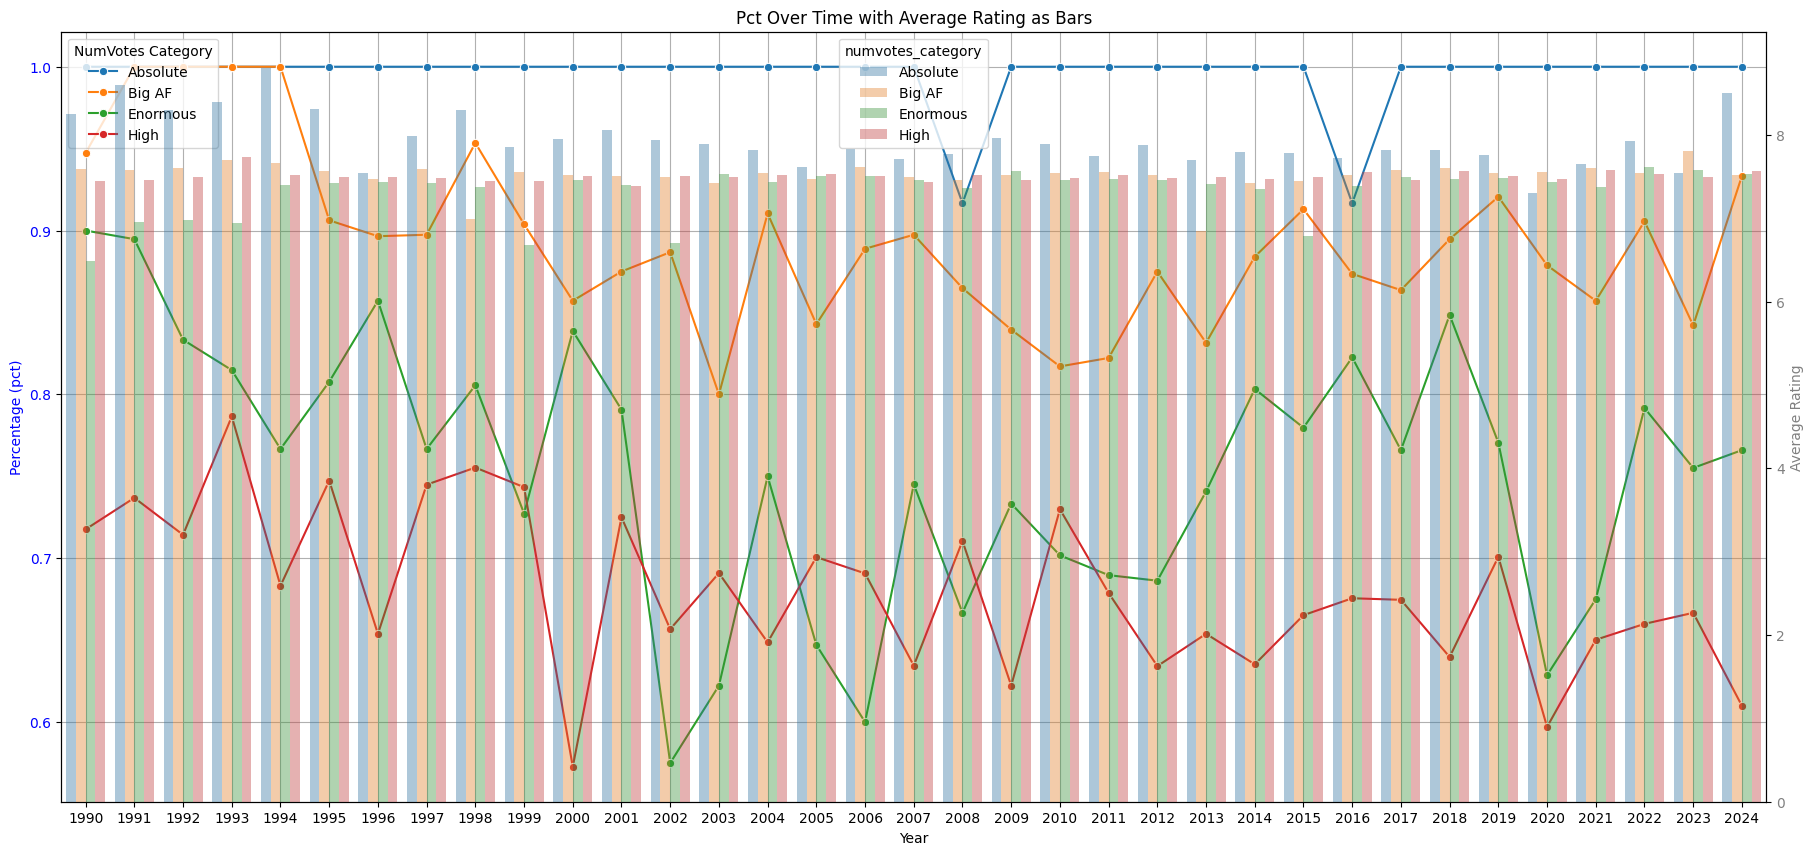

In [70]:
# Plot 'pct' over time for each 'numvotes_category'

grouped2=grouped[(grouped['numvotes_category'].isin(['High','Enormous','Big AF','Absolute']))&(grouped['rating_category'].isin(['good','amazing']))&(grouped['startYear'].astype(int)>=1990)].groupby(['startYear', 'numvotes_category']).agg({'averageRating': 'mean', 'total_count': 'mean', 'count': 'count','pct': 'sum'})
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped2, x='startYear', y='pct', hue='numvotes_category', marker='o')

# Formatting
ax1.set_ylabel('Percentage (pct)', color='blue')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(title='NumVotes Category', loc='upper left')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'averageRating'
sns.barplot(data=grouped2, x='startYear', y='averageRating', alpha=0.4, hue='numvotes_category', ax=ax2)
ax2.set_ylabel('Average Rating', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')
#plt.xticks(rotation=90)

plt.show()

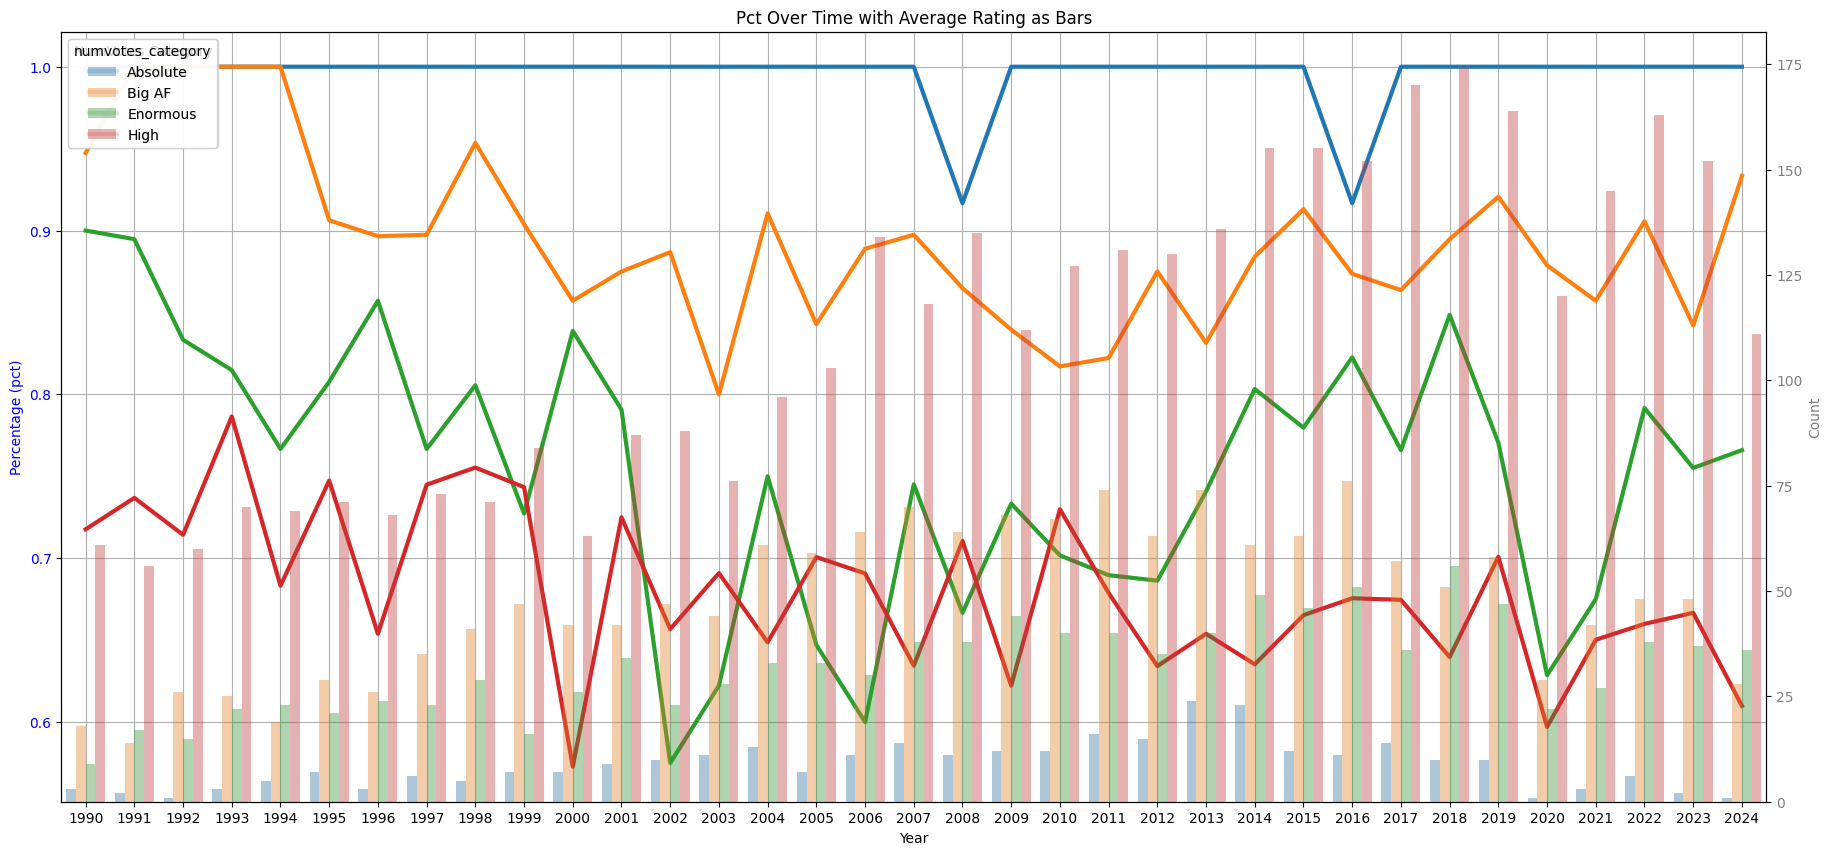

In [96]:
# Plot 'pct' over time for each 'numvotes_category'

grouped2=grouped[(grouped['numvotes_category'].isin(['High','Enormous','Big AF','Absolute']))&(grouped['rating_category'].isin(['good','amazing']))&(grouped['startYear'].astype(int)>=1990)].groupby(['startYear', 'numvotes_category']).agg({'averageRating': 'mean', 'total_count': 'mean', 'count': 'sum','pct': 'sum'})
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped2, x='startYear', y='pct', hue='numvotes_category',linewidth = 3)

# Formatting
ax1.set_ylabel('Percentage (pct)', color='blue')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(title='NumVotes Category', loc='upper left')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'averageRating'
sns.barplot(data=grouped2, x='startYear', y='count', alpha=0.4, hue='numvotes_category', ax=ax2)
ax2.set_ylabel('Count', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')
#plt.xticks(rotation=90)

plt.show()

<ipython-input-100-097e8c3d69e6>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(title='NumVotes Category', loc='upper left')


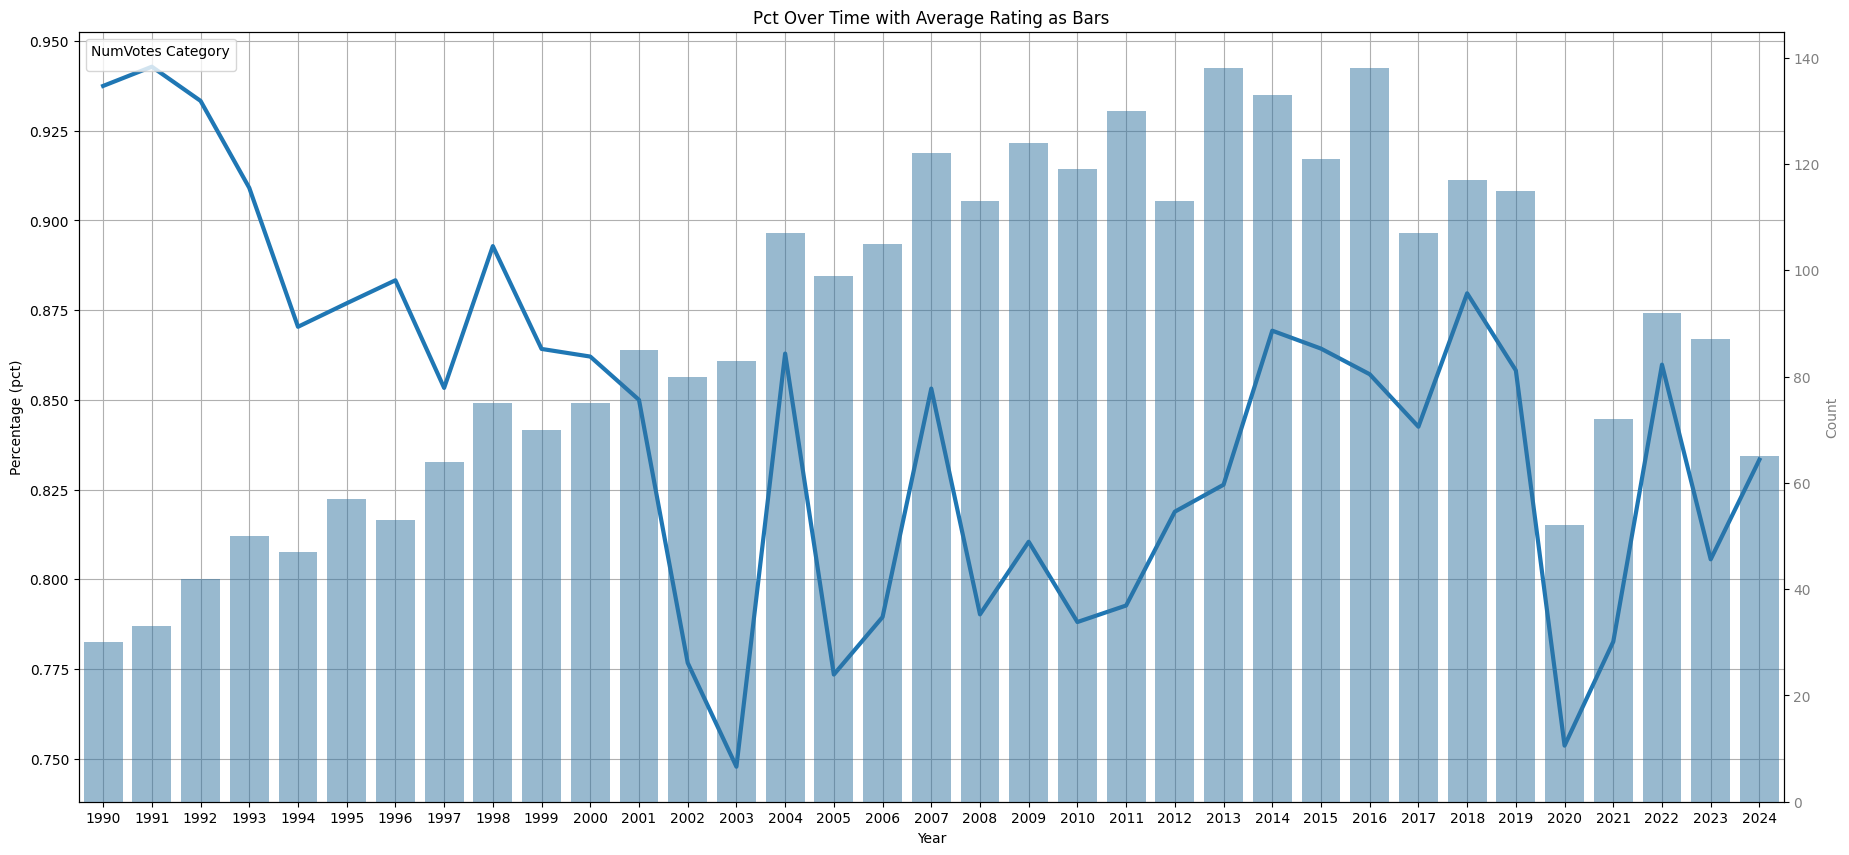

In [100]:
# Plot 'pct' over time for each 'numvotes_category'
# Group by all three columns and count tconst
grouped3 = movie_ratings_db[movie_ratings_db['numvotes_category'].isin(['Enormous','Big AF','Absolute'])].groupby(['startYear', 'rating_category']).agg({'averageRating': 'mean', 'numVotes': 'mean', 'tconst': 'count'}).rename(columns={'tconst': 'count'})

# Group by only 'startYear' and 'numvotes_category' to get total count per main category
total_counts2 = movie_ratings_db[movie_ratings_db['numvotes_category'].isin(['Enormous','Big AF','Absolute'])].groupby(['startYear']).agg({'averageRating': 'mean', 'tconst': 'count'}).rename(columns={'averageRating':'averageRating_all','tconst': 'total_count'})

# Merge to calculate 'pct'
grouped3 = grouped3.merge(total_counts2, left_index=True, right_index=True)
grouped3['pct'] = grouped3['count'] / grouped3['total_count']
grouped3 = grouped3.reset_index()
grouped4=grouped3[grouped3['rating_category'].isin(['good','amazing'])].groupby(['startYear']).agg({'averageRating': 'mean', 'total_count': 'mean', 'count': 'sum','pct': 'sum'}).reset_index()
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped4[grouped4['startYear'].astype(int)>=1990], x='startYear', y='pct',linewidth = 3)

# Formatting
ax1.set_ylabel('Percentage (pct)', color='black')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(title='NumVotes Category', loc='upper left')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'averageRating'
sns.barplot(data=grouped4[grouped4['startYear'].astype(int)>=1990], x='startYear', y='count', alpha=0.5, ax=ax2)
ax2.set_ylabel('Count', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')



# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')
#plt.xticks(rotation=90)

plt.show()

<ipython-input-99-53eb2f6781e6>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(title='NumVotes Category', loc='upper left')


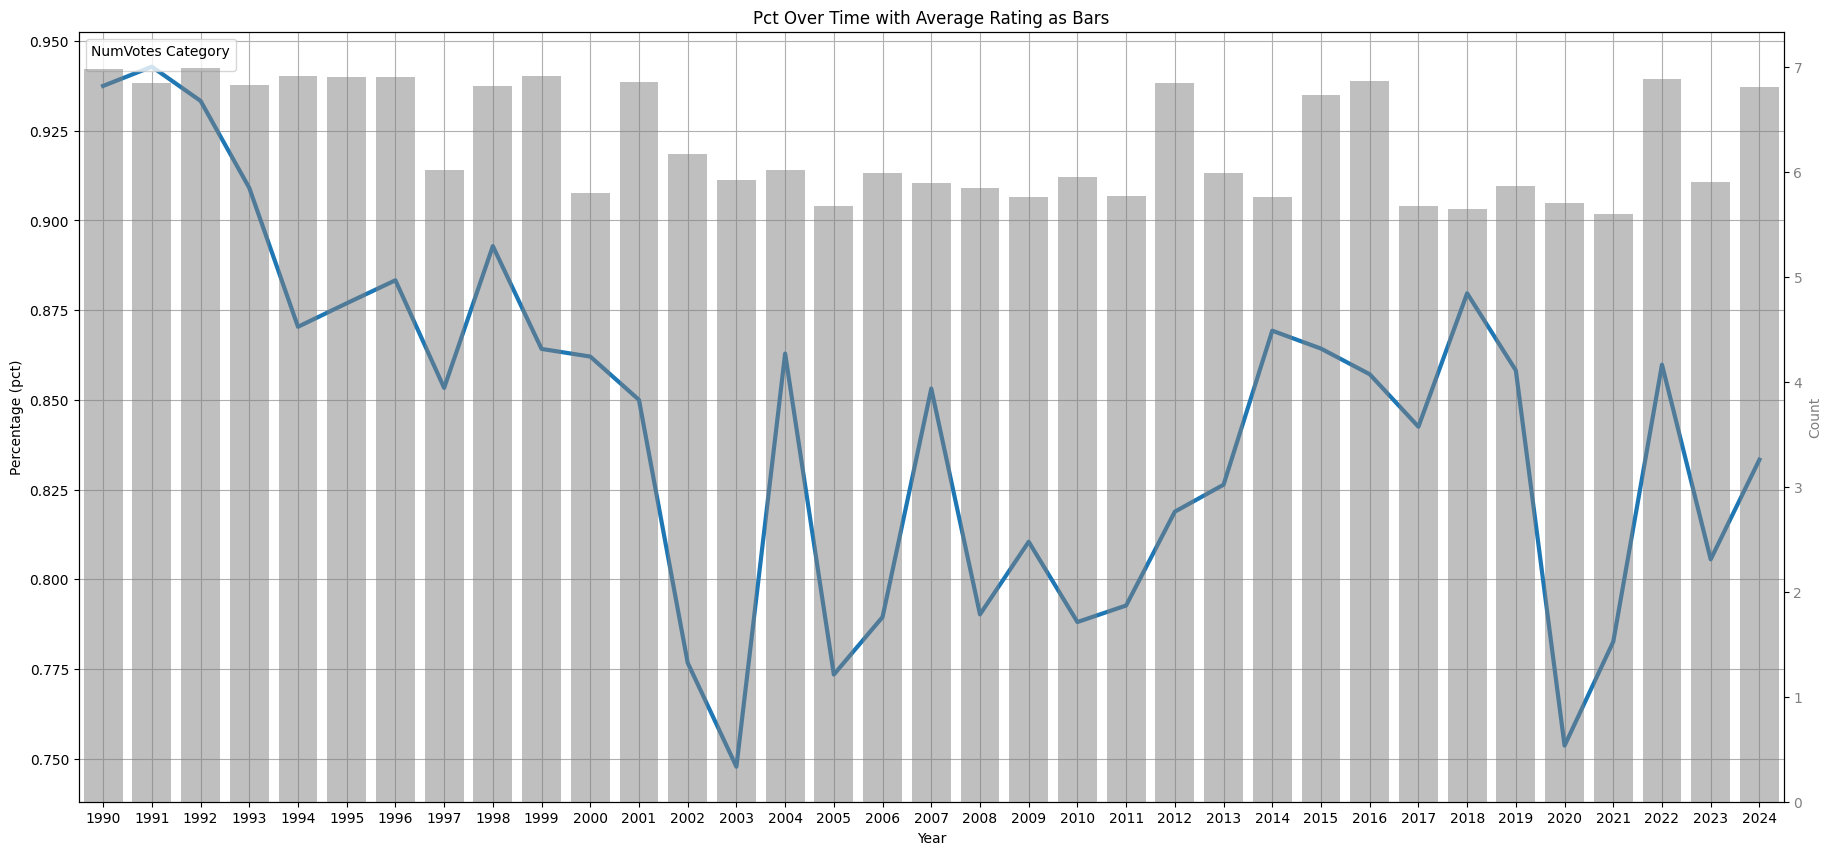

In [99]:
fig, ax1 = plt.subplots(figsize=(22, 10))
sns.lineplot(data=grouped4[grouped4['startYear'].astype(int)>=1990], x='startYear', y='pct',linewidth = 3)

# Formatting
ax1.set_ylabel('Percentage (pct)', color='black')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(title='NumVotes Category', loc='upper left')
ax1.grid(True)

# Create second y-axis for bar chart
ax2 = ax1.twinx()

# Bar chart for 'averageRating'
sns.barplot(data=grouped3[grouped3['startYear'].astype(int)>=1990].groupby('startYear')['averageRating'].mean().reset_index(), x='startYear', y='averageRating', alpha=0.5, color='grey', ax=ax2)
ax2.set_ylabel('Count', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')



# Title and final adjustments
plt.title('Pct Over Time with Average Rating as Bars')
#plt.xticks(rotation=90)

plt.show()